(50000, 28, 28) (50000,)


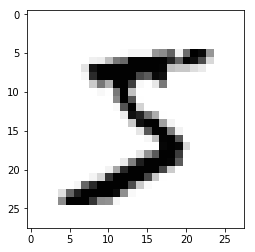

In [22]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");


In [23]:
import tensorflow as tf
import numpy as np

learning_rate = 1.0
training_epochs = 60
batch_size = 500
display_step = 1

In [24]:
X_train = X_train.reshape([X_train.shape[0],784])   #We're reshaping it to change the input from 2-dimensions to 1-dimension
X_val = X_val.reshape([X_val.shape[0],784]) 
X_test = X_test.reshape([X_test.shape[0],784])
y_train = np.eye(10)[y_train]
y_val = np.eye(10)[y_val]
y_test = np.eye(10)[y_test]

In [25]:
n_x = X_train.shape[1]
n_h = 500
n_y = 10

tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=(None, 784), name='input')
y = tf.placeholder(tf.float32, shape=(None))

w1 = tf.get_variable("W1", shape=[n_x, n_h], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1", shape=[n_h], initializer=tf.zeros_initializer())
w2 = tf.get_variable("W2", shape=[n_h, n_y], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2", shape=[n_y], initializer=tf.zeros_initializer())

#forward propagation
z1 = tf.matmul(x, w1) + b1 
a1 = tf.nn.tanh(z1) #  tanh
z2 = tf.matmul(a1, w2) + b2 
a2 = tf.nn.softmax(z2) #  relu

def compute_loss(y_pred,y_true):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))
    return cost

loss = compute_loss(a2, y)

#optimizer =  tf.train.RMSPropOptimizer(0.001, 0.9).minimize(loss) 
optimizer =tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(loss)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
#model optimization


Test cost after 1 epochs: 1.6225219
Test cost after 2 epochs: 1.6052123
Test cost after 3 epochs: 1.5960897
Test cost after 4 epochs: 1.5196736
Test cost after 5 epochs: 1.5089294
Test cost after 6 epochs: 1.501051
Test cost after 7 epochs: 1.4952118
Test cost after 8 epochs: 1.4932822
Test cost after 9 epochs: 1.4908928
Test cost after 10 epochs: 1.4898694
Test cost after 11 epochs: 1.4874667
Test cost after 12 epochs: 1.4863521
Test cost after 13 epochs: 1.4840206
Test cost after 14 epochs: 1.4826657
Test cost after 15 epochs: 1.4819503
Test cost after 16 epochs: 1.478137
Test cost after 17 epochs: 1.4763416
Test cost after 18 epochs: 1.4749326
Test cost after 19 epochs: 1.4745587
Test cost after 20 epochs: 1.4745036
Test cost after 21 epochs: 1.4755864
Test cost after 22 epochs: 1.477335
Test cost after 23 epochs: 1.4767238
Test cost after 24 epochs: 1.4746882
Test cost after 25 epochs: 1.4761627
Test cost after 26 epochs: 1.4739069
Test cost after 27 epochs: 1.4703639
Test cost aft

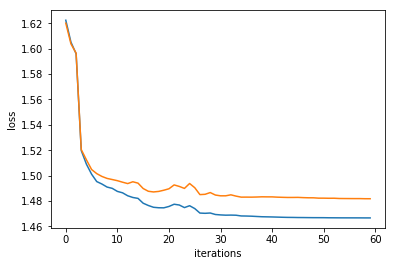

Train Accuracy: 0.99448
Test Accuracy: 0.9804


In [26]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    train_costs = []  
    test_costs = []
    for epoch in range(training_epochs):
        for i in range(0, X_train.shape[0], batch_size):
            sess.run(optimizer, feed_dict={x:X_train[i:i+batch_size], y:y_train[i:i+batch_size]}) 
        train_costs.append(sess.run(loss, feed_dict={x:X_train, y:y_train}))
        test_costs.append(sess.run(loss, feed_dict={x:X_test, y:y_test}))
        #if epoch%10 == 9:                                                       #printing cost after every 10th epoch
        print("Test cost after " + str(epoch+1)+ " epochs: "+ str(train_costs[-1]))
        
    iterations = list(range(training_epochs))
    plt.plot(iterations, train_costs, label='Train')
    plt.plot(iterations, test_costs, label='Test')
    plt.ylabel('loss')
    plt.xlabel('iterations')
    plt.show()
    
    predict_op = tf.argmax(a2, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({x: X_train, y: y_train})
    test_accuracy = accuracy.eval({x: X_test, y: y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)